In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
df.drop(columns=["month","year"], inplace=True,axis = 1)

In [10]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

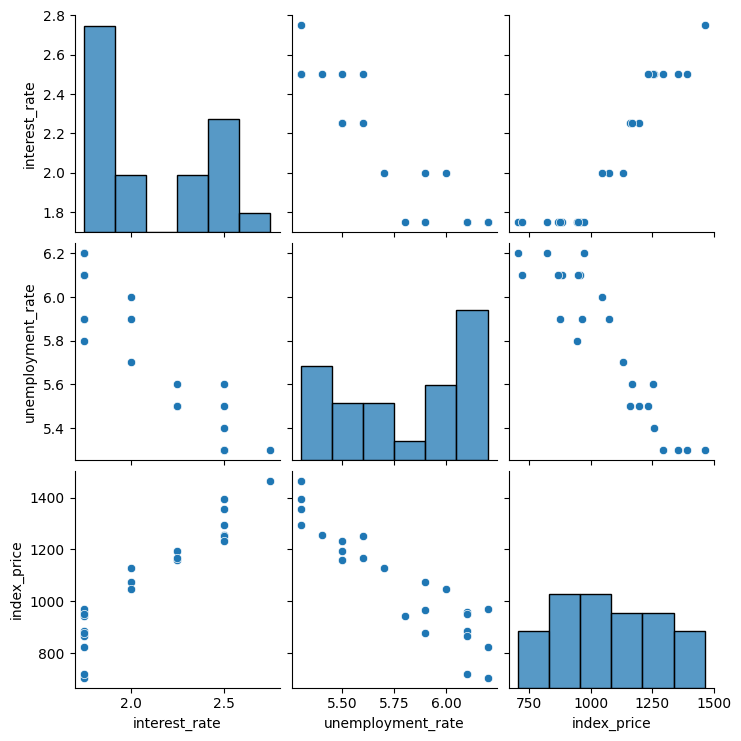

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


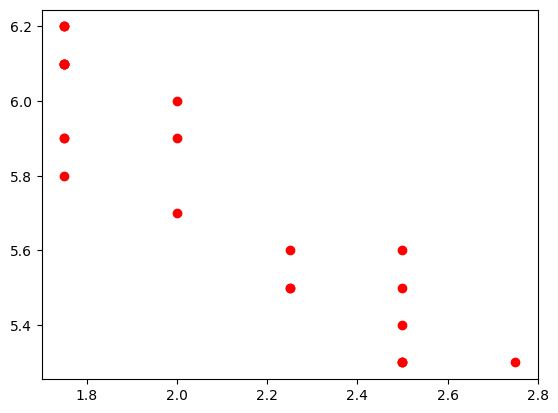

In [14]:
plt.scatter(df["interest_rate"],df["unemployment_rate"],color = 'red')

In [15]:
#X=df[["interest_rate","unemployment_rate"]]
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

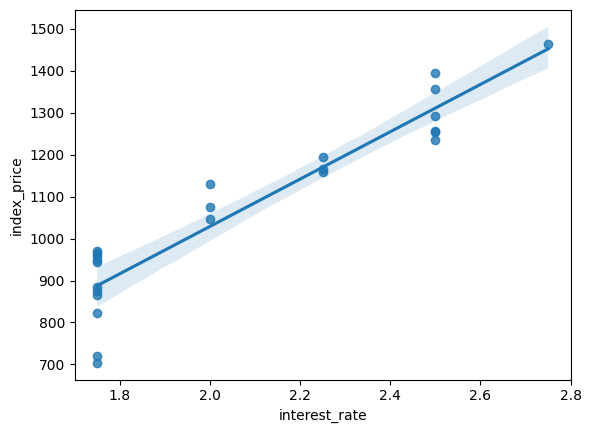

In [20]:
sns.regplot(x='interest_rate', y='index_price', data=df)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

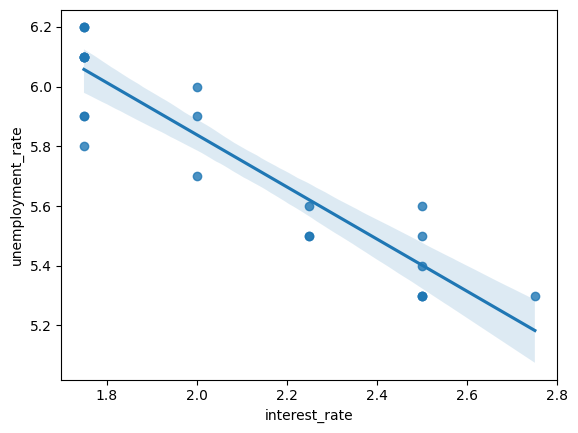

In [21]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

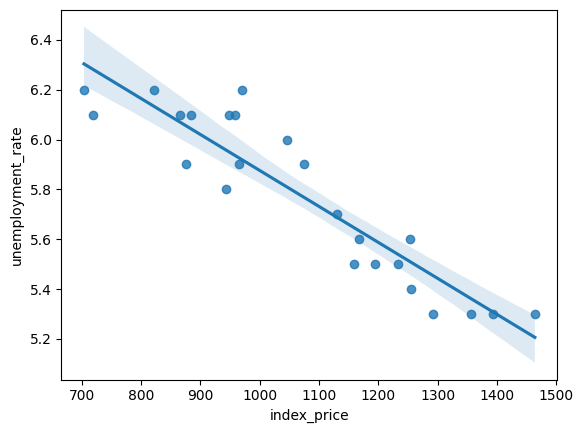

In [22]:
sns.regplot(x='index_price', y='unemployment_rate', data=df)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
 

In [28]:
regression.fit(X_train, y_train)


LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)

In [30]:
validation_score

array([-62.17890383, -85.09549795, -51.24389355])

In [31]:
np.mean(validation_score)

np.float64(-66.17276510903106)

In [32]:
y_pred = regression.predict(X_test)

In [33]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mse, mae, r2, rmse

(5793.762887712569,
 59.935781523235484,
 0.8278978091457145,
 np.float64(76.11677139574805))

In [36]:
# Adjusted R2 score
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428576

# Assumptions

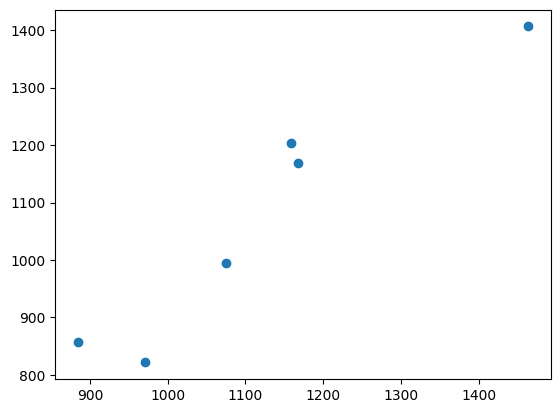

In [37]:
plt.scatter(y_test, y_pred)

In [38]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

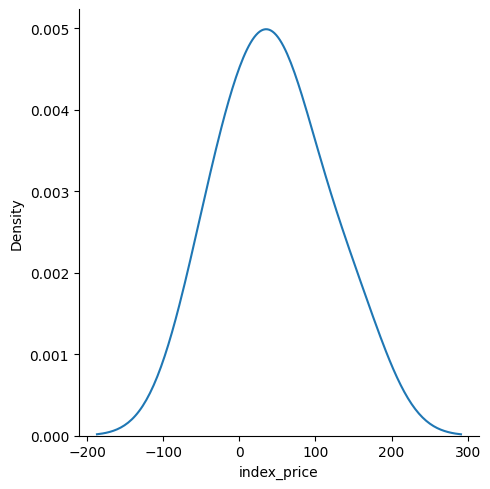

In [39]:
sns.displot(residuals,kind='kde')

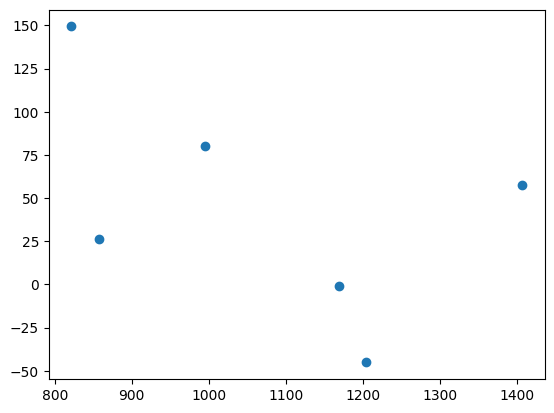

In [40]:
plt.scatter(y_pred, residuals)

In [41]:
import statsmodels.api as sm

In [42]:
model = sm.OLS(y_train, X_train).fit()

In [43]:
prediction = model.predict(X_test)

In [44]:
prediction

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [45]:
model.summary()

c:\Users\ruchi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 08 Oct 2025   Prob (F-statistic):                       0.754
Time:                        20:22:28   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
regression.coef_

array([  88.27275507, -116.25716066])